In [15]:
import matplotlib.pyplot as plt 

import numpy as np
import pandas as pd
import geopandas as gpd
from textwrap import wrap

In [16]:
# Get data of labor
sex_work = pd.read_stata( r'../../data/geopandas_data/8_trab_sex_20.dta' )

# creamos ubigeo por deparatamento a dos digitos y a provincia a 4 digitos

sex_work[ 'dpt_code' ] = sex_work.cod_ubigeo.str[ :2 ]
sex_work[ 'prov_code' ] = sex_work.cod_ubigeo.str[ :4 ]

# Sex work
women_work = sex_work[ sex_work.sex == 'Mujer' ].copy().reset_index( drop = True )


In [17]:
sex_work

,cod_ubigeo,district,month,sex,empl,dpt_code,prov_code
0,010101,CHACHAPOYAS,January,S.I.,171,01,0101
1,010101,CHACHAPOYAS,January,Hombre,1959,01,0101
2,010101,CHACHAPOYAS,January,Mujer,805,01,0101
3,010101,CHACHAPOYAS,February,S.I.,158,01,0101
4,010101,CHACHAPOYAS,February,Hombre,1798,01,0101
...,...,...,...,...,...,...,...
53419,250401,PURUS,November,Hombre,2,25,2504
53420,250401,PURUS,November,Mujer,3,25,2504
53421,250401,PURUS,December,S.I.,0,25,2504
53422,250401,PURUS,December,Hombre,2,25,2504


In [18]:
women_work

,cod_ubigeo,district,month,sex,empl,dpt_code,prov_code
0,010101,CHACHAPOYAS,January,Mujer,805,01,0101
1,010101,CHACHAPOYAS,February,Mujer,812,01,0101
2,010101,CHACHAPOYAS,March,Mujer,804,01,0101
3,010101,CHACHAPOYAS,April,Mujer,678,01,0101
4,010101,CHACHAPOYAS,May,Mujer,589,01,0101
...,...,...,...,...,...,...,...
17803,250401,PURUS,August,Mujer,3,25,2504
17804,250401,PURUS,September,Mujer,3,25,2504
17805,250401,PURUS,October,Mujer,3,25,2504
17806,250401,PURUS,November,Mujer,3,25,2504


In [19]:
# get data from lima
women_work[ 'month' ] = pd.to_datetime( women_work.month , format = '%B' ) \
                                    .dt.strftime( '%m' ) \
                                    .astype( int )
# '%B'  full month name

women_work

,cod_ubigeo,district,month,sex,empl,dpt_code,prov_code
0,010101,CHACHAPOYAS,1,Mujer,805,01,0101
1,010101,CHACHAPOYAS,2,Mujer,812,01,0101
2,010101,CHACHAPOYAS,3,Mujer,804,01,0101
3,010101,CHACHAPOYAS,4,Mujer,678,01,0101
4,010101,CHACHAPOYAS,5,Mujer,589,01,0101
...,...,...,...,...,...,...,...
17803,250401,PURUS,8,Mujer,3,25,2504
17804,250401,PURUS,9,Mujer,3,25,2504
17805,250401,PURUS,10,Mujer,3,25,2504
17806,250401,PURUS,11,Mujer,3,25,2504


### Tipo de fecha 

#### Revisar para más información

[Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Period.strftime.html)

In [20]:
# Sort by department and month
women_work.sort_values([ 'dpt_code', 'month'], inplace = True )

# Get the total number of women workers by dpt
dpt_women_work = women_work.groupby( [ 'dpt_code', 'month'], as_index = False )[['empl']] \
                            .sum() \
                            .rename( columns = {'empl' :'women_empl'})

# Sort by dpt code and month
dpt_women_work.sort_values([ 'dpt_code', 'month'], inplace = True )

In [21]:
# data by department 

df2 = dpt_women_work.groupby( ['dpt_code'],as_index = False )[['women_empl']].mean()

In [22]:
df2

,dpt_code,women_empl
0,01,1947.750000
1,02,18277.000000
2,03,3077.666667
3,04,57583.583333
4,05,3976.750000
5,06,9634.333333
6,07,40806.416667
7,08,19503.666667
8,09,675.333333
9,10,6222.750000


# Load Shapefile

In [23]:
# Load shapefile, limite departamental 

dpt_shp = gpd.read_file( r'../../data/geopandas_data/LIMITE_DEPARTAMENTO/LIMITE_DEP.shp' )

In [24]:
dpt_shp

,OBJECTID,CCDD,NOMBDEP,Shape_Leng,Shape_Area,geometry
0,1,01,AMAZONAS,12.912088,3.203006,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995..."
1,2,02,ANCASH,11.771520,2.954605,"POLYGON ((-77.64697 -8.05086, -77.64689 -8.051..."
2,3,03,APURIMAC,7.730154,1.765933,"POLYGON ((-73.74655 -13.17442, -73.74570 -13.1..."
3,4,04,AREQUIPA,17.429625,5.330203,"POLYGON ((-71.98109 -14.64062, -71.98093 -14.6..."
4,5,05,AYACUCHO,17.127166,3.643705,"POLYGON ((-74.34843 -12.17503, -74.35000 -12.1..."
5,6,06,CAJAMARCA,12.399239,2.684527,"POLYGON ((-78.70034 -4.62769, -78.69817 -4.629..."
6,7,07,CALLAO,1.131635,0.011740,"POLYGON ((-77.13504 -11.81820, -77.13484 -11.8..."
7,8,08,CUSCO,21.794434,6.000331,"POLYGON ((-72.97280 -11.25189, -72.97134 -11.2..."
8,9,09,HUANCAVELICA,9.561245,1.839851,"POLYGON ((-74.57118 -11.98710, -74.57095 -11.9..."
9,10,10,HUANUCO,14.589840,3.089811,"POLYGON ((-75.99200 -8.32108, -75.99015 -8.321..."


In [25]:
# Merge shapefile e información de empleo 

df3 = pd.merge( dpt_shp, df2, left_on = 'CCDD', right_on = 'dpt_code', validate = "1:1")

(-81.96202805934995,
 -68.01848153364996,
 -19.26654382434996,
 0.8770101193500551)

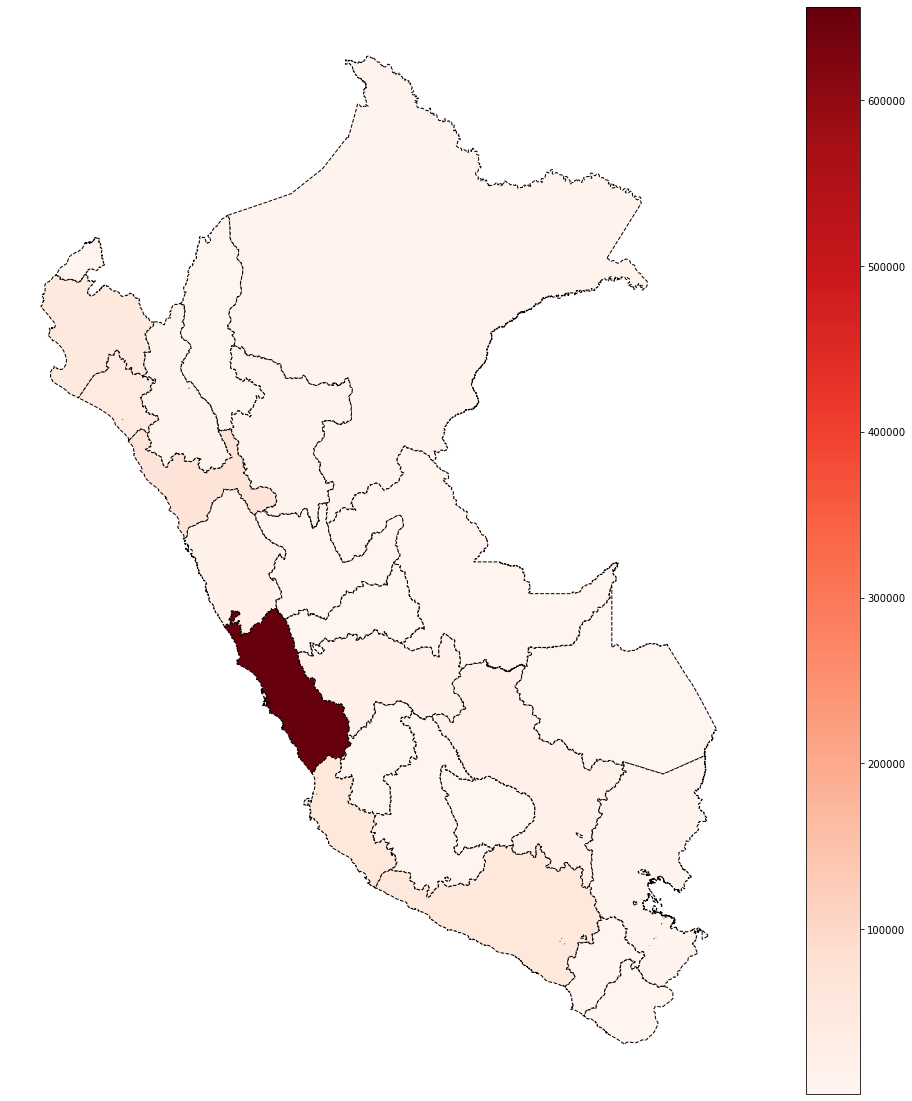

In [26]:
# Plot mapa de calor 

fig, ax = plt.subplots(figsize=(20, 20))

# women_empl, se crea el mapa de calor a partir del dato de empleo 

df3.plot( column='women_empl', cmap='Reds', linestyle='--',
                      edgecolor='black', 
                      legend = True, ax = ax)  # sin ax = ax obtendriamos dos graficos separados

plt.axis("off")  # sin el marco en el mapa 

(-81.96202805934995,
 -68.01848153364996,
 -19.26654382434996,
 0.8770101193500551)

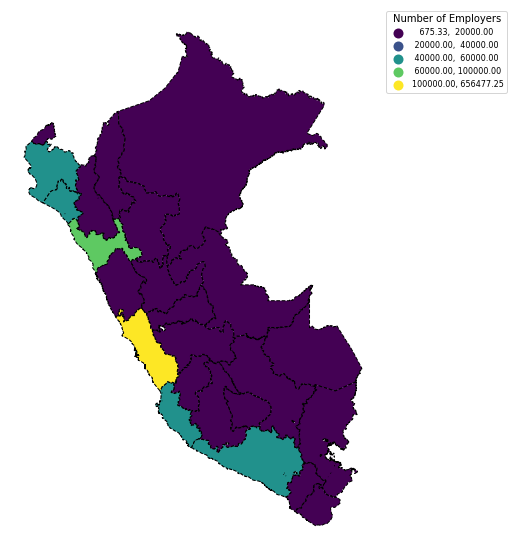

In [27]:
# Mapa de calor con tramos definidos manualmente en el dato de empleo

fig, ax = plt.subplots(figsize=(10, 10))

df3.plot( ax = ax, 
        column='women_empl', # variable
             cmap= 'viridis', # paleta de color
         linestyle='--',  # contorno punteado
         edgecolor='black', 
         legend = True,  
         scheme = "User_Defined", 
         classification_kwds = dict( bins = [ 20000, 40000, 60000, 100000  ] ),  # bins: cortes 
         legend_kwds = dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1), # y¿ubicación
                            fontsize='x-large',  # tamaño de letra
                            title= "Number of Employers",  # titulo
                            frameon= True, # cuadro en la leyenda
                           prop= {'size': 8})  # frameon: cuadro en al leyenda 
        )

plt.axis("off")  # sin el marco en el mapa 

##  Colors and pallete

[Link](https://seaborn.pydata.org/tutorial/color_palettes.html)


<AxesSubplot:>

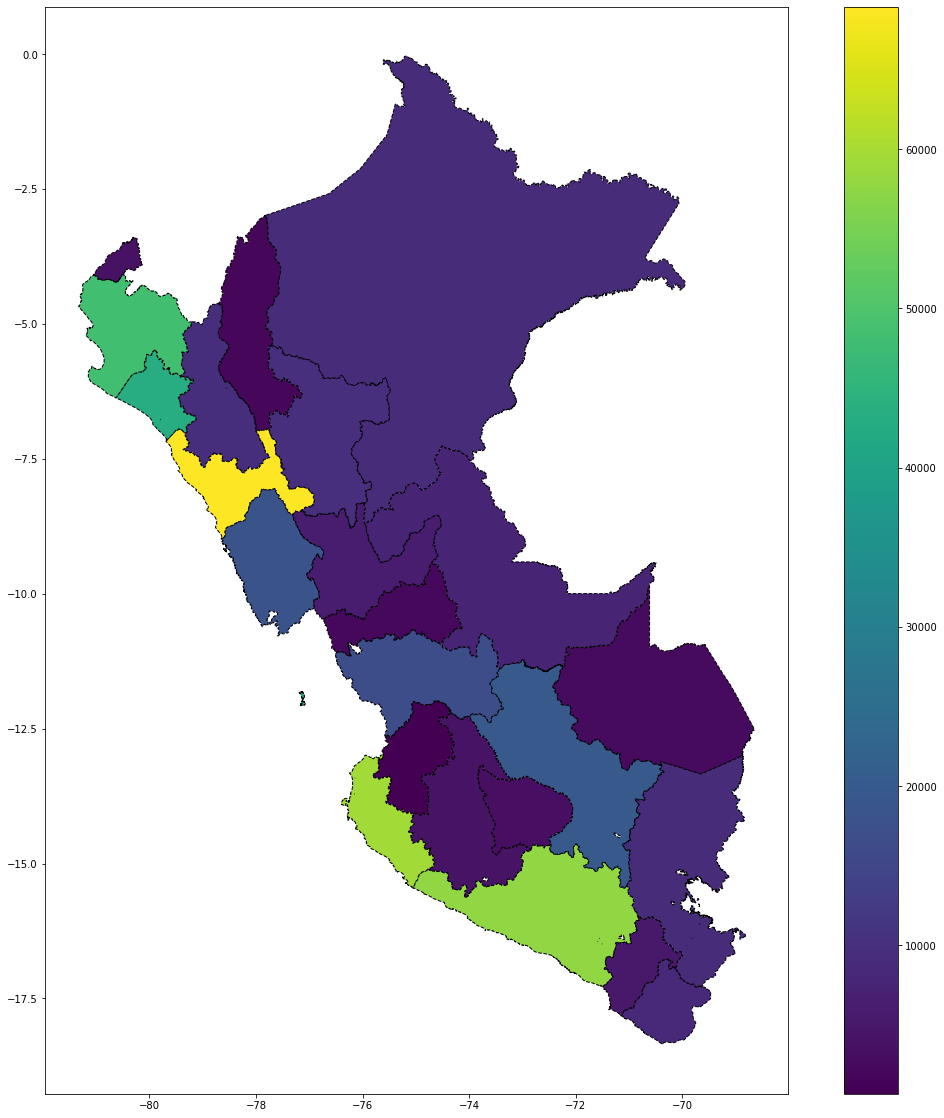

In [28]:
# Sin tomar en cuenta a Lima metropolitana y Lima provincia 

df3[ df3.CCDD != "15" ].plot( column='women_empl', cmap='viridis', figsize=(20, 20), linestyle='--',
                      edgecolor='black', 
                      legend = True)

<AxesSubplot:>

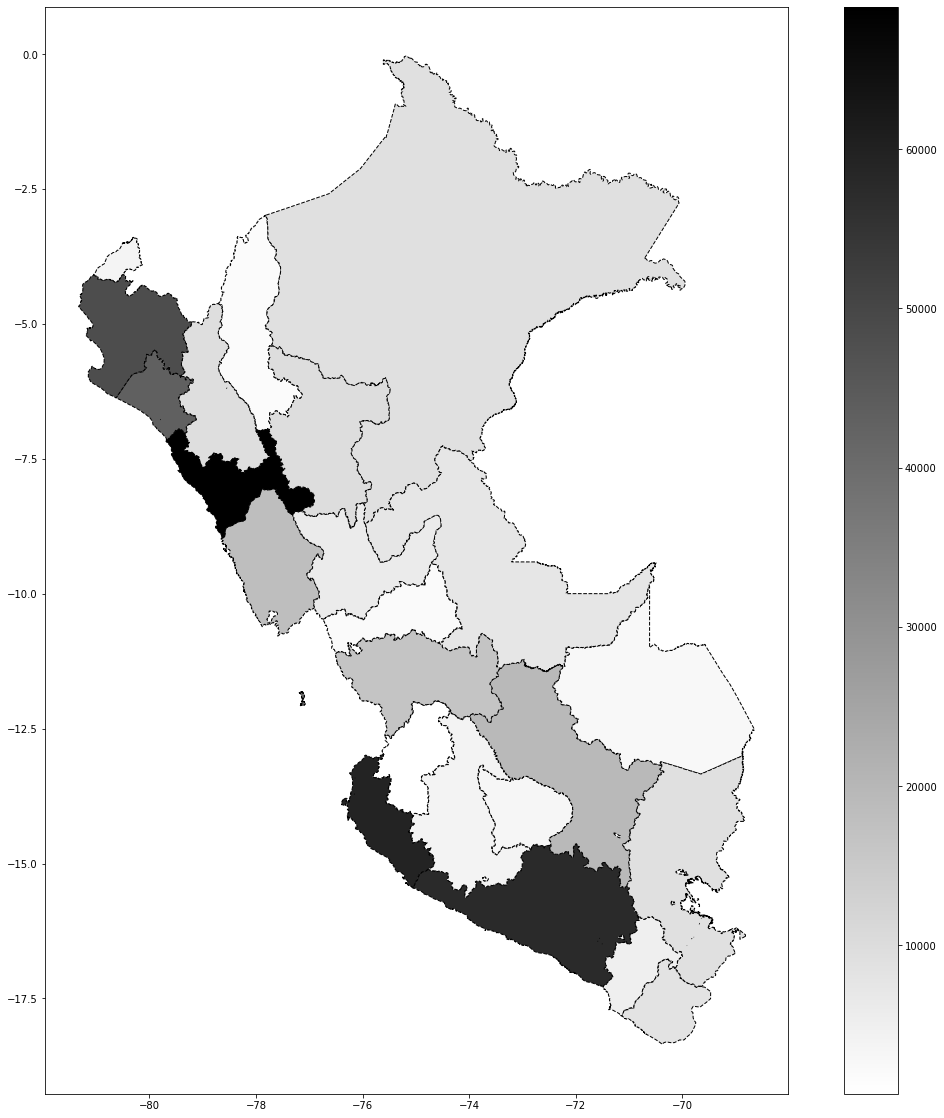

In [39]:
# Escala de grises 

df3[ df3.CCDD != "15" ].plot( column='women_empl', cmap='gray_r', figsize=(20, 20), linestyle='--',
                      edgecolor='black', 
                      legend = True)

In [29]:
# cantidad  PEA por departamento , genero y mes 
df4 = sex_work.groupby( ['dpt_code', 'month', 'sex'], as_index = False )[['empl']].sum() \
        .pivot( index = [ 'dpt_code', 'month' ] , columns = 'sex',values='empl') \
        .reset_index()
 # reshape a partir de las categorias sex
df4

sex,dpt_code,month,S.I.,Hombre,Mujer
0,01,January,472,5108,2043
1,01,February,441,4951,2059
2,01,March,423,4459,2056
3,01,April,314,3211,1811
4,01,May,297,3049,1642
...,...,...,...,...,...
295,25,August,1654,16885,7425
296,25,September,1689,17886,7549
297,25,October,1812,19223,7751
298,25,November,1882,19758,7933


In [30]:
# proporción de muejeres respecto al total PEA

df4[ 'prop_wom' ] = ( df4.Mujer * 100 / (df4.Hombre+df4.Mujer+df4['S.I.']) )

In [31]:
df4

sex,dpt_code,month,S.I.,Hombre,Mujer,prop_wom
0,01,January,472,5108,2043,26.800472
1,01,February,441,4951,2059,27.633875
2,01,March,423,4459,2056,29.633900
3,01,April,314,3211,1811,33.939280
4,01,May,297,3049,1642,32.919006
...,...,...,...,...,...,...
295,25,August,1654,16885,7425,28.597289
296,25,September,1689,17886,7549,27.831441
297,25,October,1812,19223,7751,26.926284
298,25,November,1882,19758,7933,26.825145


In [32]:
# merge con shapefile 

df5 = dpt_shp.merge( df4, left_on = 'CCDD', right_on = 'dpt_code'  )

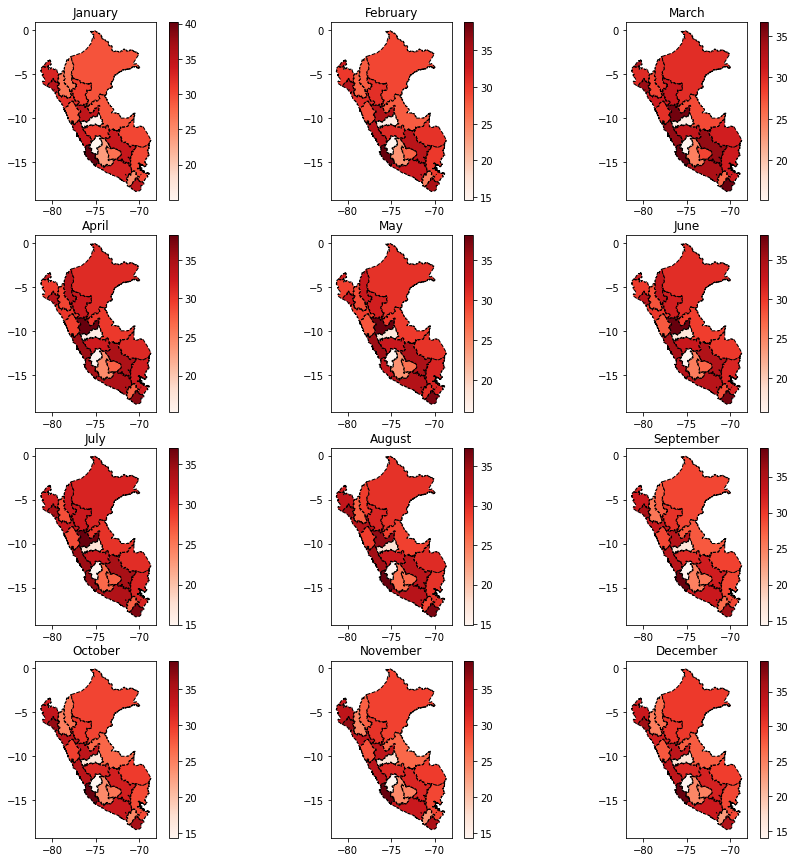

In [33]:
fig, axis = plt.subplots( nrows = 4, ncols= 3, figsize = ( 15, 15 ) )

idx = 0
for i in range( 4 ): # loop por fila 
    for j in range ( 3 ):  # loop por columna
        
        
        ax = axis[ i ][ j ]  # permite definir en que posición se ubica el gráficos 
        
        month = df5.month.unique()[ idx ]  # se filtra el mes 
        
        df6 = df5[ df5.month == month ]  # filtra mes 
        
        df6.plot( column='prop_wom', 
                  cmap='Reds', 
                  linestyle='--',
                  edgecolor='black', 
                  legend = True, 
                  ax = ax 
                )
        
        ax.set_title( month ) # añadir titulo
        
        idx = idx + 1

In [34]:
# Inverting colour map
cmap = plt.cm.OrRd

In [35]:
# Se remplaza missing en el dato de Lima 

df5.loc[ (df5.NOMBDEP == 'LIMA'), 'prop_wom' ] = np.nan

<AxesSubplot:>

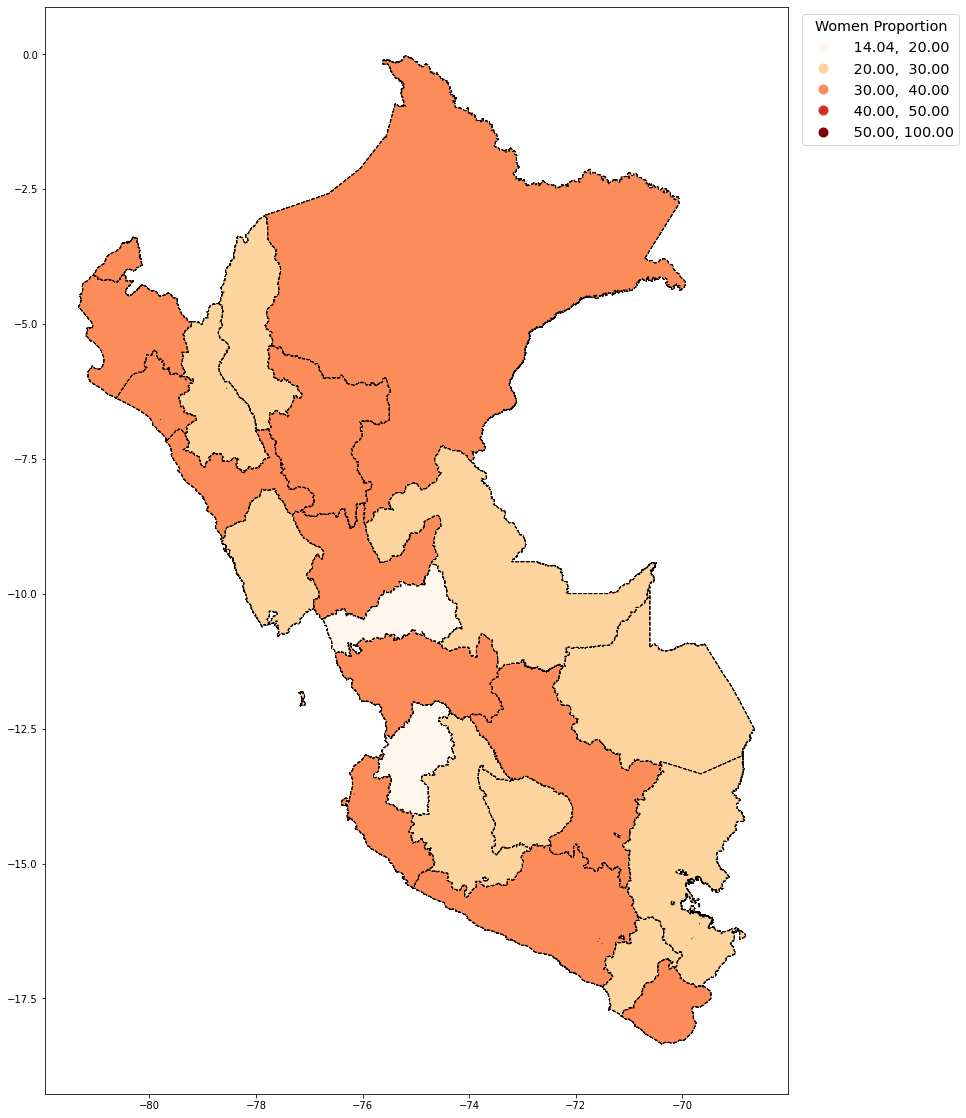

In [36]:
fig, ax = plt.subplots(figsize=(20, 20))
df5.plot( ax = ax, 
        column='prop_wom', 
         cmap= cmap, 
         linestyle='--',
         edgecolor='black', 
         legend = True,  
         scheme = "User_Defined", 
         classification_kwds = dict( bins = [ 20, 30, 40, 50,  100 ] ), # bins
         legend_kwds=dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Women Proportion", 
                            title_fontsize = 'x-large', 
                            frameon= True )
        )


<AxesSubplot:>

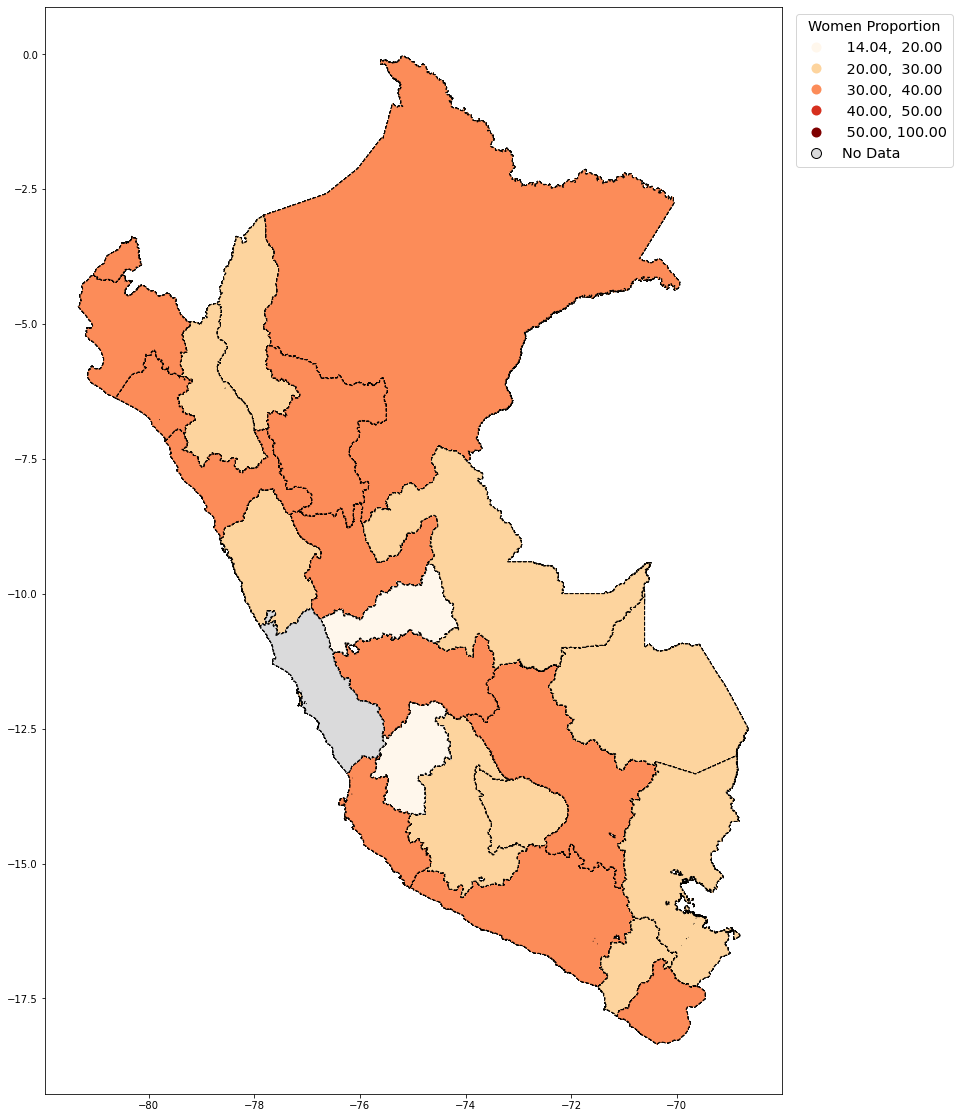

In [37]:
    fig, ax = plt.subplots(figsize=(20, 20))
    df5.plot( ax = ax, 
            column='prop_wom', 
             cmap= cmap, 
             linestyle='--',
             edgecolor='black', 
             legend = True,  
             scheme = "User_Defined", 
             missing_kwds= dict(color = "#DADADB", label='No Data'),   # color en missing y etiqueta 
             classification_kwds = dict( bins = [ 20, 30, 40, 50,  100 ] ), 
             legend_kwds=dict(  loc='upper left',
                                bbox_to_anchor=(1.01, 1),
                                fontsize='x-large',
                                title= "Women Proportion", 
                                title_fontsize = 'x-large', 
                                frameon= True)
            )

